In [1]:
import tensorflow as tf 
import numpy as np

mnist = tf.keras.datasets.mnist                             # 28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)         # Normalize the images
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2632 - accuracy: 0.9225
Epoch 2/3
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1071 - accuracy: 0.9665
Epoch 3/3
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0739 - accuracy: 0.9761


In [2]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 22us/sample - loss: 0.0976 - accuracy: 0.9727
0.09760566021492705 0.9727


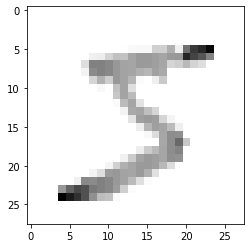

In [3]:
import matplotlib.pyplot as plt 

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [4]:
model.save('isthisokay.model')


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: isthisokay.model\assets


In [5]:
new_model = tf.keras.models.load_model('isthisokay.model')

In [6]:
predictions = new_model.predict(x_test)         # problem here with lists

In [7]:
print(predictions)

[[2.37314524e-09 1.37540965e-07 7.17570629e-06 ... 9.99898076e-01
  1.31483304e-07 2.09389100e-06]
 [1.45154274e-07 3.57311830e-04 9.99631405e-01 ... 1.28606858e-08
  2.37718609e-06 1.13356202e-09]
 [2.23868355e-08 9.99112546e-01 1.42544895e-05 ... 7.94747612e-05
  7.60267721e-04 6.04266802e-07]
 ...
 [5.34756373e-09 2.48282572e-06 7.30451518e-07 ... 9.61127880e-05
  1.81813193e-05 2.66465882e-04]
 [4.78690687e-08 2.31898539e-07 5.46930181e-08 ... 1.21991945e-06
  7.94682186e-03 6.98931180e-09]
 [1.12803843e-06 1.25920405e-06 6.68045614e-05 ... 4.27625002e-09
  2.96045109e-05 1.42682921e-07]]


In [8]:
print(np.argmax(predictions[0]))

7


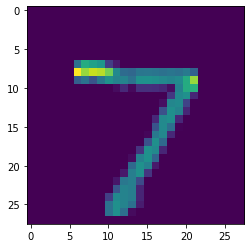

In [9]:
plt.imshow(x_test[0])
plt.show()

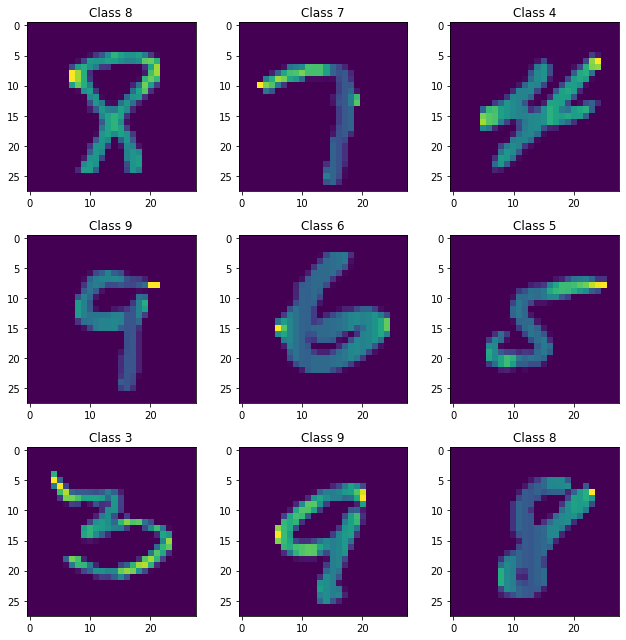

In [10]:
import random
plt.rcParams['figure.figsize'] = (9, 9)

for i in range(9):
    plt.subplot(3, 3, i+1)
    number = random.randint(0, len(x_test))
    plt.imshow(x_test[number], interpolation='none')
    plt.title("Class {}".format(np.argmax(predictions[number])))

plt.tight_layout()